In [9]:
import pandas as pd
df = pd.read_csv(r"C:\Users\nikim\Desktop\HPI_data_final.csv")
df.head()

,land,jahr,hpi,arbeitslosenrate,inflation,leitzinsen,bev_wachstum,einkommen,migration,corona_dummy
0,Belgium,2015,100.00,8.7,100.00,0.05,40310,44132.0,146626.0,0
1,Belgium,2016,102.33,7.9,101.77,0.00,40590,45076.0,123702.0,0
2,Belgium,2017,105.95,7.2,104.03,0.00,41030,45364.0,126703.0,0
3,Belgium,2018,109.15,6.0,106.44,0.00,41610,46422.0,137860.0,0
4,Belgium,2019,113.23,5.5,107.77,0.00,42400,47550.0,150006.0,0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

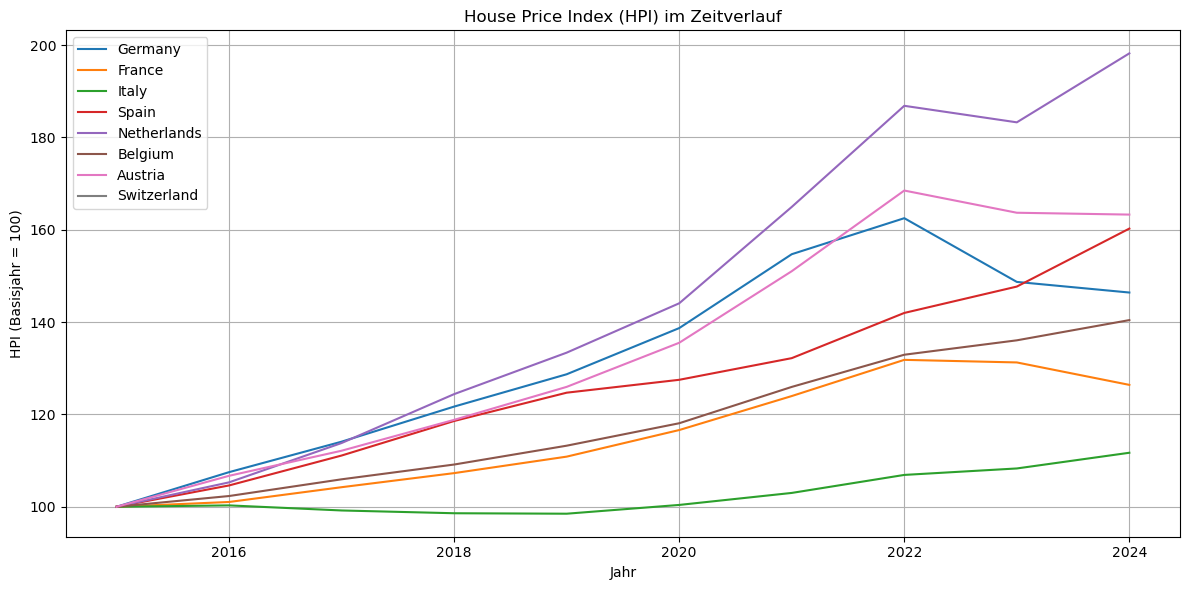

In [14]:
länder = ['Germany', 'France', 'Italy', 'Spain', 'Netherlands', 'Belgium', 'Austria', 'Switzerland'] 

plt.figure(figsize=(12, 6))
for land in länder:
    daten = df[df['land'] == land]
    plt.plot(daten['jahr'], daten['hpi'], label=land)
    
plt.title('House Price Index (HPI) im Zeitverlauf')
plt.xlabel('Jahr')
plt.ylabel('HPI (Basisjahr = 100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

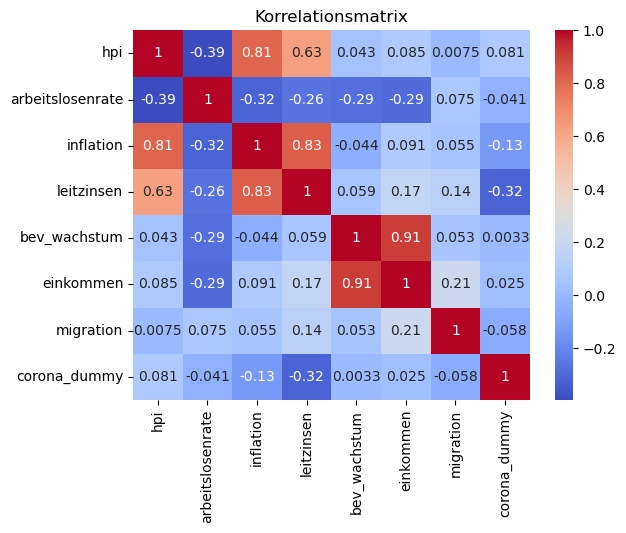

In [15]:
corr_df = df[['hpi', 'arbeitslosenrate', 'inflation', 'leitzinsen', 'bev_wachstum', 'einkommen', 'migration', 'corona_dummy']].corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()

In [11]:
import statsmodels.api as sm

In [16]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv(r"C:\Users\nikim\Desktop\HPI_data_final.csv")

df = df.dropna(subset=[ 'hpi', 'arbeitslosenrate', 'inflation', 'leitzinsen', 
                       'bev_wachstum', 'einkommen', 'migration', 'corona_dummy'])

X = df[['inflation', 'arbeitslosenrate', 'leitzinsen', 
        'bev_wachstum', 'einkommen', 'migration', ]]
y = df['hpi']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    hpi   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     64.74
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           9.61e-40
Time:                        17:28:32   Log-Likelihood:                -663.76
No. Observations:                 162   AIC:                             1342.
Df Residuals:                     155   BIC:                             1363.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -150.7849     24.787  

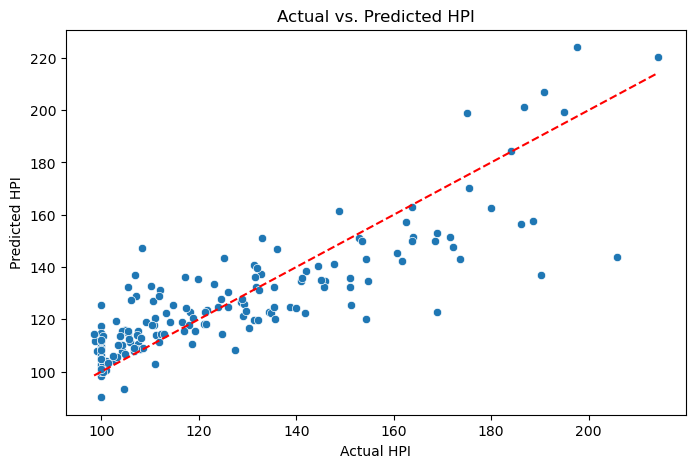

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red') 
plt.xlabel("Actual HPI")
plt.ylabel("Predicted HPI")
plt.title("Actual vs. Predicted HPI")
plt.show()


In [31]:
from statsmodels.stats.diagnostic import het_breuschpagan

y_pred = model.predict(X)
residuals = y - y_pred

bp_test = het_breuschpagan(residuals, X)

labels = ['LM Statistic', 'LM p-value', 'F-statistic', 'F p-value']
results = dict(zip(labels, bp_test))

print("Breusch-Pagan Heteroskedasticity Test Results:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

Breusch-Pagan Heteroskedasticity Test Results:
LM Statistic: 24.4296
LM p-value: 0.0010
F-statistic: 4.5874
F p-value: 0.0003


In [7]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv(r"C:\Users\nikim\Desktop\HPI_data_final.csv")

df = df.dropna(subset=['hpi', 'inflation', 'arbeitslosenrate', 'leitzinsen', 
                       'bev_wachstum', 'einkommen', 'migration', 'corona_dummy'])

X = df[['inflation', 'arbeitslosenrate', 'leitzinsen', 
        'bev_wachstum', 'einkommen', 'migration', 'corona_dummy']]
y = df['hpi']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model_robust = model.get_robustcov_results(cov_type='HC3')
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                    hpi   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     79.21
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           8.31e-48
Time:                        00:41:16   Log-Likelihood:                -652.63
No. Observations:                 162   AIC:                             1321.
Df Residuals:                     154   BIC:                             1346.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -121.3437     33.547  

In [9]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare
import statsmodels.api as sm

df = pd.read_csv(r"C:\Users\nikim\Desktop\HPI_data_final.csv")

df = df.dropna(subset=['hpi', 'inflation', 'arbeitslosenrate', 'leitzinsen', 
                       'bev_wachstum', 'einkommen', 'migration', 'corona_dummy', 'land', 'jahr'])

df = df.set_index(['land', 'jahr'])

fe_model = PanelOLS.from_formula(
    formula='hpi ~ inflation + arbeitslosenrate + leitzinsen + bev_wachstum + einkommen + migration + corona_dummy + EntityEffects',
    data=df
).fit(cov_type='robust')

print("Fixed Effects:\n")
print(fe_model.summary)

Fixed Effects:

                          PanelOLS Estimation Summary                           
Dep. Variable:                    hpi   R-squared:                        0.8672
Estimator:                   PanelOLS   R-squared (Between):             -0.5922
No. Observations:                 162   R-squared (Within):               0.8672
Date:                Wed, Jul 16 2025   R-squared (Overall):             -0.5437
Time:                        00:44:17   Log-likelihood                   -579.42
Cov. Estimator:                Robust                                           
                                        F-statistic:                      127.80
Entities:                          18   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                   F(7,137)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             196.53
            

In [19]:
re_model = RandomEffects.from_formula(
    formula='hpi ~ inflation + arbeitslosenrate + leitzinsen + bev_wachstum + einkommen + migration + corona_dummy',
    data=df
).fit()
print("\nRandom Effects:\n")
print(re_model.summary)


Random Effects:

                        RandomEffects Estimation Summary                        
Dep. Variable:                    hpi   R-squared:                        0.9331
Estimator:              RandomEffects   R-squared (Between):              0.9889
No. Observations:                 162   R-squared (Within):               0.8112
Date:                Wed, Jul 16 2025   R-squared (Overall):              0.9830
Time:                        00:44:10   Log-likelihood                   -617.78
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      309.04
Entities:                          18   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                   F(7,155)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             309.04
          

In [23]:
print("\nHausman-Test:\n")
comparison = compare({'FE': fe_model, 'RE': re_model})
print(comparison)



Hausman-Test:

                    Model Comparison                   
                                   FE                RE
-------------------------------------------------------
Dep. Variable                     hpi               hpi
Estimator                    PanelOLS     RandomEffects
No. Observations                  162               162
Cov. Est.                      Robust        Unadjusted
R-squared                      0.8672            0.9331
R-Squared (Within)             0.8672            0.8112
R-Squared (Between)           -0.5922            0.9889
R-Squared (Overall)           -0.5437            0.9830
F-statistic                    127.80            309.04
P-value (F-stat)               0.0000            0.0000
=====================     ===========   ===============
inflation                      1.9310            1.3190
                             (8.8460)          (16.495)
arbeitslosenrate              -1.5713           -2.7925
                            (-2.

In [ ]:
import pandas as pd
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# Lade deine Daten
df = pd.read_csv("C:/Users/nikim/Desktop/HPI_data_final.csv")

# Panelstruktur setzen
df = df.set_index(['land', 'jahr'])

# Fehlende Werte entfernen
df = df.dropna(subset=['hpi', 'inflation', 'arbeitslosenrate', 'leitzinsen',
                       'bev_wachstum', 'einkommen', 'migration', 'corona_dummy'])

# Regressoren und Zielvariable definieren
X = df[['inflation', 'arbeitslosenrate', 'leitzinsen',
        'bev_wachstum', 'einkommen', 'migration', 'corona_dummy']]
y = df['hpi']

# Konstante NICHT hinzufügen – Fixed Effects Modell macht das automatisch
# Modell schätzen
model_fe = PanelOLS(y, X, entity_effects=True)
results_fe = model_fe.fit(cov_type='robust')

# Ergebnisse anzeigen
print(results_fe.summary)